# 19 de septiembre de 2023


## Estadísticas de E coli

### Distribución de GSMs por GSE

In [32]:
import pandas as pd 
data03 = pd.read_csv("../results/230903/tests/230903Test.tsv", sep='\t')
taxa = pd.read_csv("../results/230903/tests/taxonomy_relations_mini.tsv", sep='\t').rename(columns={"TaxId":"taxonID"})

In [21]:
data_tx = pd.merge(data[['taxonID', "GSE_geo_accession", "GSM_geo_accession"]], taxa[['taxonID', "ScientificNameSpecie"]])

In [22]:
e_coli = data_tx[data_tx["ScientificNameSpecie"] == "Escherichia coli"]

In [23]:
# Number of GSMs/GSE
number_of_GSMs = e_coli['GSE_geo_accession'].value_counts()
number_of_GSMs

GSE20305     122
GSE80002      90
GSE35371      60
GSE71784      48
GSE47732      48
            ... 
GSE16726       2
GSE102322      2
GSE35049       2
GSE24373       2
GSE43376       1
Name: GSE_geo_accession, Length: 86, dtype: int64

<AxesSubplot:>

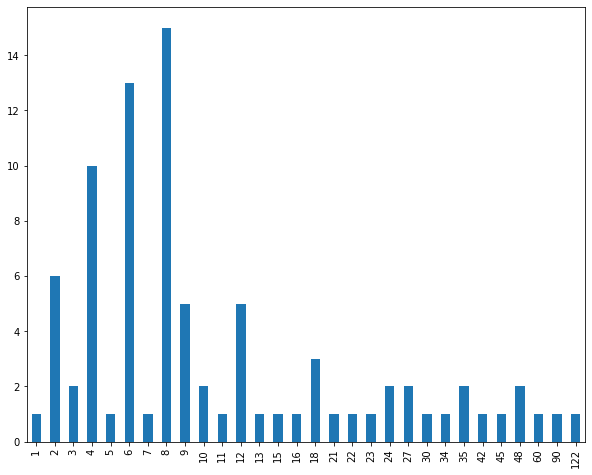

In [34]:
# GSM distribution
number_of_GSMs.value_counts().sort_index().plot(kind='bar', figsize=(10,8))

### Tipos de archivos

In [68]:
from ftplib import FTP

In [164]:
def get_files_data(path):
    ftp = FTP("ftp.ncbi.nlm.nih.gov")
    ftp.login()
    files = [(name.rstrip('.gz').split('.')[-1], int(data.get("size"))) for name,data in ftp.mlsd(path, ["size", "type"]) if data['type'] == 'file']
    ftype,size = zip(*files)
    return((';'.join(set(ftype)), sum(size)))

In [191]:
e_coli = e_coli.merge(data[["GSM_geo_accession", "GSM_supplementary_file"]])

In [180]:
ftype,size = zip(*[get_files_data(path) for path in e_coli["GSM_supplementary_file"].unique()])

In [198]:
e_coli_files = pd.DataFrame.from_dict({"GSM_geo_accession" : e_coli["GSM_geo_accession"].unique(), "File_type":ftype, "File_size":size})

In [199]:
e_coli = e_coli.merge(e_coli_files)

In [202]:
e_coli["File_type"].unique()

array(['txt', 'pair', 'gpr', 'CEL;CHP', 'CEL', 'csv', 'ftr;txt',
       'txt;pair', 'mev', 'cel', 'CHP'], dtype=object)

In [207]:
e_coli[e_coli["File_type"] == 'ftr;txt']

,taxonID,GSE_geo_accession,GSM_geo_accession,ScientificNameSpecie,GSM_supplementary_file,File_type,File_size
459,511145,GSE57084,GSM1374996,Escherichia coli,geo/samples/GSM1374nnn/GSM1374996/suppl/,ftr;txt,3969377
460,511145,GSE57084,GSM1374997,Escherichia coli,geo/samples/GSM1374nnn/GSM1374997/suppl/,ftr;txt,3964788
461,511145,GSE57084,GSM1374998,Escherichia coli,geo/samples/GSM1374nnn/GSM1374998/suppl/,ftr;txt,3977027
462,511145,GSE57084,GSM1374999,Escherichia coli,geo/samples/GSM1374nnn/GSM1374999/suppl/,ftr;txt,3955700
463,511145,GSE57084,GSM1375000,Escherichia coli,geo/samples/GSM1375nnn/GSM1375000/suppl/,ftr;txt,3951458
464,511145,GSE57084,GSM1375001,Escherichia coli,geo/samples/GSM1375nnn/GSM1375001/suppl/,ftr;txt,3981908
603,511145,GSE47221,GSM1147038,Escherichia coli,geo/samples/GSM1147nnn/GSM1147038/suppl/,ftr;txt,3913668
604,511145,GSE47221,GSM1147039,Escherichia coli,geo/samples/GSM1147nnn/GSM1147039/suppl/,ftr;txt,3949100
605,511145,GSE47221,GSM1147040,Escherichia coli,geo/samples/GSM1147nnn/GSM1147040/suppl/,ftr;txt,3921892
606,511145,GSE47221,GSM1147041,Escherichia coli,geo/samples/GSM1147nnn/GSM1147041/suppl/,ftr;txt,3953843


In [208]:
e_coli.to_csv("../results/230919/eColiFilesData.tsv", sep="\t", index=False, header=True)

eukaTestBig : 1683258
GSM2981051


# 20 de septiembre de 2023

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv("../results/230919/eColiFilesData.tsv", sep='\t')

<AxesSubplot:>

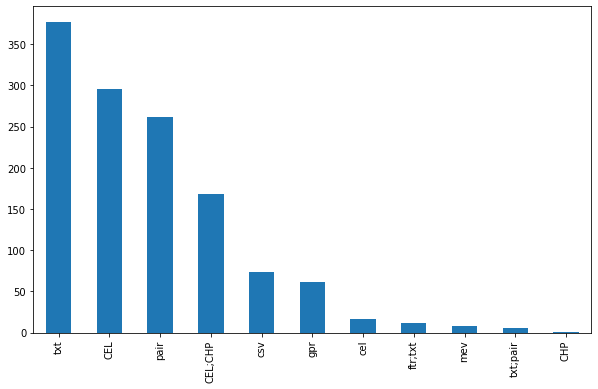

In [29]:
data["File_type"].value_counts().plot(kind='bar', figsize=(10,6))

In [49]:
data[data["File_type"] == "pair"]

,taxonID,GSE_geo_accession,GSM_geo_accession,ScientificNameSpecie,GSM_supplementary_file,File_type,File_size
16,511145,GSE144316,GSM4285723,Escherichia coli,geo/samples/GSM4285nnn/GSM4285723/suppl/,pair,2170842
17,511145,GSE144316,GSM4285723,Escherichia coli,geo/samples/GSM4285nnn/GSM4285723/suppl/,pair,2170842
18,511145,GSE144315,GSM4285723,Escherichia coli,geo/samples/GSM4285nnn/GSM4285723/suppl/,pair,2170842
19,511145,GSE144315,GSM4285723,Escherichia coli,geo/samples/GSM4285nnn/GSM4285723/suppl/,pair,2170842
20,511145,GSE144316,GSM4285727,Escherichia coli,geo/samples/GSM4285nnn/GSM4285727/suppl/,pair,2166970
...,...,...,...,...,...,...,...
789,511145,GSE29424,GSM727652,Escherichia coli,geo/samples/GSM727nnn/GSM727652/suppl/,pair,1025226
790,511145,GSE29424,GSM727653,Escherichia coli,geo/samples/GSM727nnn/GSM727653/suppl/,pair,1031102
791,511145,GSE29424,GSM727654,Escherichia coli,geo/samples/GSM727nnn/GSM727654/suppl/,pair,1051456
792,511145,GSE29424,GSM727655,Escherichia coli,geo/samples/GSM727nnn/GSM727655/suppl/,pair,1050436


In [31]:
data.shape

(1278, 7)

In [46]:
ecoli_txids = taxa[(taxa["ScientificNameSpecie"] == "Escherichia coli") & (taxa["taxonID"] != 562 )]["taxonID"].to_list()

In [48]:
data03[data03['taxonID'].isin(ecoli_txids)].shape

(1260, 25)

In [5]:
file_man = pd.merge(data03, data, on="GSM_geo_accession")
mans = file_man[file_man["File_type"] == 'txt'][["GSM_geo_accession", "File_type", "GPL_manufacturer"]]["GPL_manufacturer"].to_list()


In [6]:
mans = set(mans)
gsms = [file_man.loc[file_man[file_man["GPL_manufacturer"] == manu].index[0],"GSM_geo_accession"] for manu in mans]
gsms

['GSM1061658',
 'GSM3409404',
 'GSM508925',
 'GSM1899947',
 'GSM1099464',
 'GSM5501743',
 'GSM279016',
 'GSM625951']

In [7]:
gsms = []
for j,man in enumerate(mans):
    for i,row in file_man.iterrows():
        if row["File_type"] == "txt":
            if row["GPL_manufacturer"] == man:
                gsms.append(row["GSM_geo_accession"])
                break
                

In [8]:
gsms

['GSM1061658',
 'GSM2464576',
 'GSM508925',
 'GSM1899947',
 'GSM1099464',
 'GSM5501743',
 'GSM279016',
 'GSM625951']

In [44]:
pd.DataFrame.from_dict({file.split('_')[0] : read_line(os.path.join(path, file)) for file in files})

NameError: name 'pd' is not defined

In [131]:
import GEOparse

In [180]:
gsms = {gsm : GEOparse.get_GEO(gsm, silent=True) for gsm in gsms}

In [181]:
ftps = [gsm.metadata.get("supplementary_file") for gsm in gsms.values()]
with open("ftp_links.txt", "w") as file:
    for ftp in ftps:
        file.write(f"https{ftp[0][3:]}\n")

### File header relation

In [52]:
import pandas as pd
import os
metadata = pd.read_csv("../results/230903/tests/230903Test.tsv", sep='\t')
file_rel = pd.read_csv("../results/230919/eColiFilesData.tsv", sep='\t')
file_man = pd.merge(metadata, file_rel, on="GSM_geo_accession")
mans = set(file_man[file_man["File_type"] == 'txt']["GPL_manufacturer"].to_list())

In [53]:
gsms = []
for j,man in enumerate(mans):
    for i,row in file_man.iterrows():
        if row["File_type"] == "txt":
            if row["GPL_manufacturer"] == man:
                gsms.append(row["GSM_geo_accession"])
                break

In [69]:
def read_line(file, line=0):
    with open(file, 'rb') as f:
        l = f.readlines()[line].decode()
    
    for char in ['\n','\r']:
        l = l.replace(char,'')
    l = l.replace('\t', '   ')
    return(l)

In [70]:
path = "../data/GSM_SUPPL_TXT/"
files = os.listdir(path)
geo_acc,heads = zip(*[(file.split('_')[0], read_line(os.path.join(path, file))) for file in files])
headers = pd.DataFrame.from_dict({"GSM_geo_accession" : geo_acc, "Header":heads})


In [71]:
headers = headers.merge(file_man, on="GSM_geo_accession")


In [72]:
headers[["GSM_geo_accession", "GPL_manufacturer","File_size", "File_type", "Header"]]

,GSM_geo_accession,GPL_manufacturer,File_size,File_type,Header
0,GSM1061658,"MYcroarray, MI. USA.",3602311,txt,ATF 1.0
1,GSM1099464,DIGITAL GENOMICS,569984,txt,ATF 1.0
2,GSM1899947,Agilent,1832337,txt,TYPE text text text integer text f...
3,GSM2464576,Affymetrix,96297,txt,# Notes : All Entities ...
4,GSM279016,"UBEC, School of Biosciences, University of Bir...",2023043,txt,Begin Header
5,GSM5501743,Agilent Technologies,803061,txt,FeatureNum Row Col SubTypeMask Control...
6,GSM625951,Agilent/OGT,3211966,txt,Image File D:\Ganwu Li\2009-02-22_0000_532.t...


In [3]:
from multpro import format_time

09/28/2023 11:50:02 AM 
##############################################################################
Star running
##############################################################################

09/28/2023 11:50:02 AM Reading arguments...
usage: ipykernel_launcher.py [-h] [-t TAXID] [-o OUTFILE] [-p PATH] [-e EMAIL]
                             [-a APIKEY] [-s SLEEPTIME] [-c CORES] [-m MAX]
                             [-r {specie,sameTaxId}]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"4d023f6e-26cd-4186-b825-c4d7a0e9104b" --shell=9007 --transport="tcp" --iopub=9009 --f=/home/diegocar/.local/share/jupyter/runtime/kernel-v2-3583920Lwu2OVRIFxkd.json


SystemExit: 2

/export/apps/bioconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
format_time(1000)

NameError: name 'format_time' is not defined